In [1]:
from sklearn.linear_model import LogisticRegression as LogRes
from sklearn.metrics import log_loss
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

In [2]:
x_test = pd.read_csv('data_digits_8_vs_9_noisy/x_test.csv')
x_train = pd.read_csv('data_digits_8_vs_9_noisy/x_train.csv')
y_test = pd.read_csv('data_digits_8_vs_9_noisy/y_test.csv')
y_train = pd.read_csv('data_digits_8_vs_9_noisy/y_train.csv')

In [3]:

accuracy = np.array([])
loss = np.array([])
coefs = np.array([])
i_list = np.array(range(40))+1
for i in i_list:
    model1_1 = LogRes(max_iter = i, random_state=0, solver = 'liblinear')
    model1_1.fit(x_train.values, y_train.values.reshape(-1))
    accuracy = np.append(accuracy ,model1_1.score(x_train.values, y_train.values))
    
    loss = np.append(loss, log_loss(y_train, model1_1.predict(x_train)))
    
    coefs = np.append(coefs, model1_1.coef_[0,0])
    

C:\ProgramData\Anaconda3\envs\spr_2022s_env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\envs\spr_2022s_env\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\ProgramData\Anaconda3\envs\spr_2022s_env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\envs\spr_2022s_env\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\ProgramData\Anaconda3\envs\spr_2022s_env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\envs\spr_2022s_env\lib

In [ ]:
accuracy

In [ ]:
loss

Text(0, 0.5, 'accuracy')

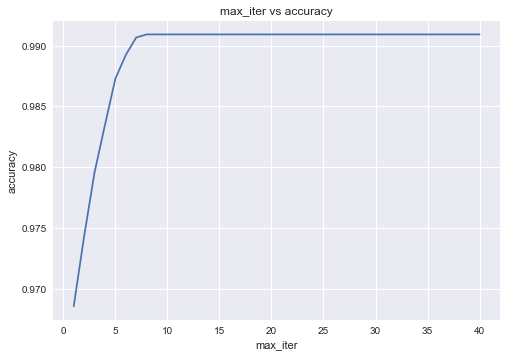

In [4]:
plt.plot(i_list, accuracy)
plt.title('max_iter vs accuracy')
plt.xlabel('max_iter')
plt.ylabel('accuracy')

Text(0, 0.5, 'log loss')

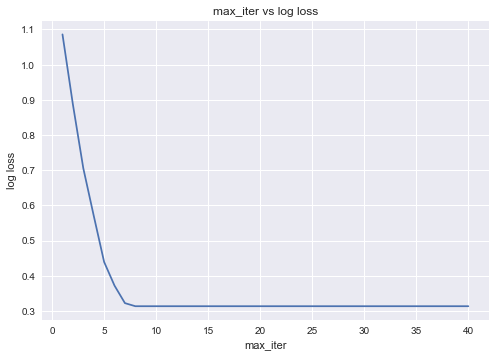

In [5]:
plt.plot(i_list, loss)
plt.title('max_iter vs log loss')
plt.xlabel('max_iter')
plt.ylabel('log loss')

In [ ]:
coefs

Text(0, 0.5, 'weight')

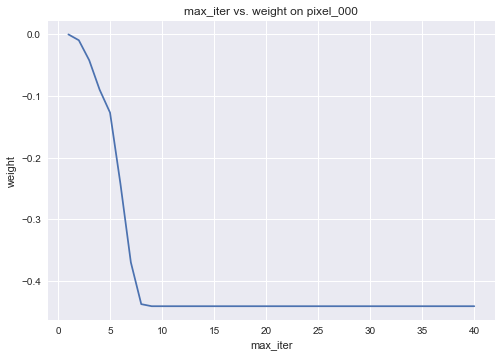

In [6]:
plt.plot(i_list, coefs)
plt.title('max_iter vs. weight on pixel_000')
plt.xlabel('max_iter')
plt.ylabel('weight')

In [7]:
accuracy = np.array([])
loss = np.array([])
coefs = np.array([])
C_grid = np.logspace(-9, 6, 31)
for c in C_grid:
    model1_3 = LogRes(C = c, random_state=0, solver = 'liblinear')
    model1_3.fit(x_train.values, y_train.values.reshape(-1))
#     accuracy = np.append(scores ,model1_1.score(x_train.values, y_train.values))
    
    loss = np.append(loss, log_loss(y_test, model1_3.predict_proba(x_test)))
    
#     coefs = np.append(coefs, model1_1.coef_[0,0])

C:\ProgramData\Anaconda3\envs\spr_2022s_env\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\ProgramData\Anaconda3\envs\spr_2022s_env\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\ProgramData\Anaconda3\envs\spr_2022s_env\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\ProgramData\Anaconda3\envs\spr_2022s_env\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\ProgramData\Anaconda3\envs\spr_2022s_env\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\ProgramData\Anaconda3\envs\spr_2022s_env\lib\si

In [8]:
C_grid.shape

(31,)

In [9]:
loss

array([0.69313875, 0.69312053, 0.69306291, 0.69288084, 0.69230649,
       0.69050341, 0.68492214, 0.66825338, 0.62274587, 0.52393367,
       0.38403206, 0.25926162, 0.17589843, 0.12711504, 0.10093773,
       0.08968956, 0.09010467, 0.10204237, 0.13073034, 0.18961282,
       0.30733325, 0.53623955, 0.81834263, 1.01685063, 1.16174143,
       1.24898016, 1.26847557, 1.34946609, 1.39457941, 1.391423  ,
       1.37595231])

In [10]:
np.argmin(loss)

15

In [11]:
loss[15]

0.08968955605292539

In [12]:
C_grid[15]

0.03162277660168379

In [13]:
1/C_grid[15]

31.622776601683796

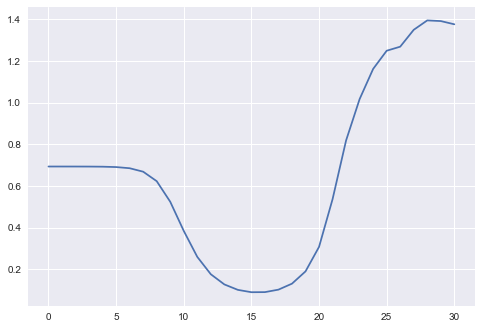

In [14]:
plt.plot(loss)

In [15]:
from sklearn import metrics

model1_3 = LogRes(C = C_grid[15], random_state=0, solver = 'liblinear')
model1_3.fit(x_train.values, y_train.values.reshape(-1))
cm = metrics.confusion_matrix(y_test, model1_3.predict(x_test))
cm_df = pd.DataFrame(data=cm, columns=[0, 1], index=[0, 1])
cm_df.columns.name = 'Predicted'
cm_df.index.name = 'True'
print(cm_df)

Predicted    0    1
True               
0          942   32
1           33  976


C:\ProgramData\Anaconda3\envs\spr_2022s_env\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [16]:
y_test.values

array([[1],
       [1],
       [1],
       ...,
       [1],
       [0],
       [1]], dtype=int64)

In [17]:
x_test.shape

(1983, 784)

In [18]:
# false positives. 
y_predict = model1_3.predict(x_test)
FPs = np.array([]).reshape(0,x_test.shape[1])
i = 0
while True:
# for i in range(y_test.shape[0]):
    if y_test.values[i,0] == 0 and y_predict[i] == 1:
        FPs = np.concatenate((FPs, x_test.values[i, :].reshape(1,-1)))
    i+=1
    if FPs.shape[0] == 9:
        break

C:\ProgramData\Anaconda3\envs\spr_2022s_env\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


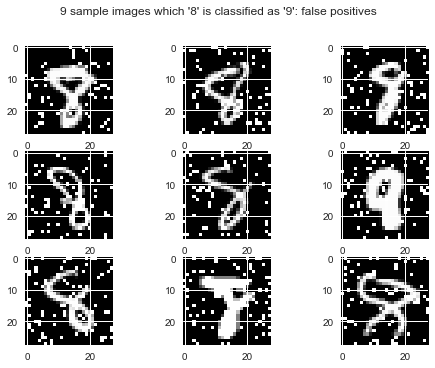

In [19]:
fig, FP_plots = plt.subplots(3,3)
fig.suptitle('9 sample images which \'8\' is classified as \'9\': false positives ')
for i in range(9):
    FP_plots[i//3, i%3].imshow(FPs[i,:].reshape(28,28), cmap = 'gray', vmin = 0.0, vmax = 1.0)

In [20]:
# False negatives
FNs = np.array([]).reshape(0,x_test.shape[1])
i = 0
while True:
# for i in range(y_test.shape[0]):
    if y_test.values[i,0] == 1 and y_predict[i] == 0:
        FNs = np.concatenate((FNs, x_test.values[i, :].reshape(1,-1)))
    i+=1
    if FNs.shape[0] == 9:
        break

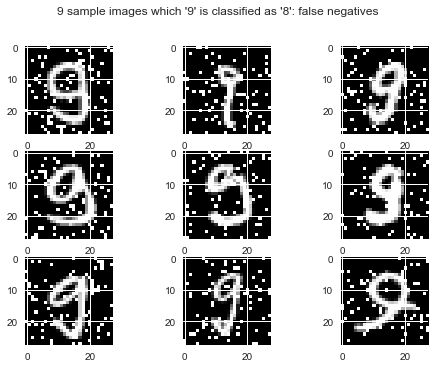

In [21]:
fig, FN_plots = plt.subplots(3,3)
fig.suptitle('9 sample images which \'9\' is classified as \'8\': false negatives ')
for i in range(9):
    FN_plots[i//3, i%3].imshow(FNs[i,:].reshape(28,28), cmap = 'gray', vmin = 0.0, vmax = 1.0)

Text(0.5, 1.0, "pixels' weights")

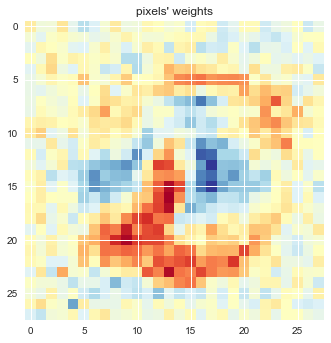

In [22]:
plt.imshow(model1_3.coef_.reshape(28,28), cmap = 'RdYlBu', vmin = -0.5, vmax = 0.5)
plt.title('pixels\' weights')

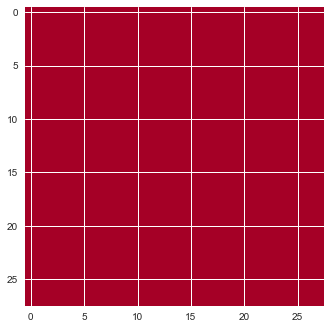

In [23]:
x = np.ones((28,28))
x.fill(-1)
# print(x)
plt.imshow(x, cmap = 'RdYlBu', vmin = -0.5, vmax = 0.5)